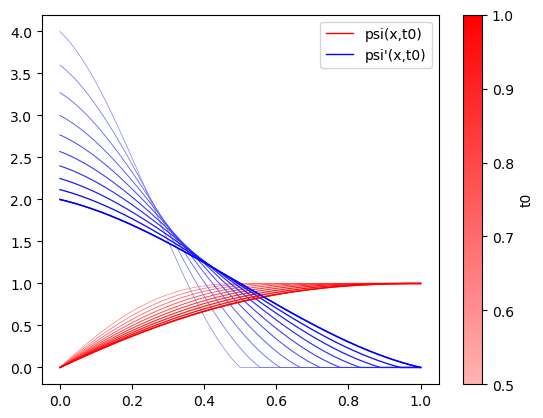

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils.FEniCSx_solver import loss_act_class

arr = np.linspace(0, 1, 1000)

# ---- t0 range ----
t0_min, t0_max = 0.5, 1.0
norm = mpl.colors.Normalize(vmin=t0_min, vmax=t0_max)

# ---- colormap matching (1, 1-t0, 1-t0) ----
colors = [(1, 1 - t, 1-t) for t in np.linspace(0.3, t0_max, 256)]
cmap = mpl.colors.ListedColormap(colors)

fig, ax = plt.subplots()

for t0 in np.linspace(0.5, 1, 10):
    psi = loss_act_class(t0)

    ax.plot(
        arr,
        psi.dx(arr),
        color=(1 - t0, 1 - t0, 1),
        linewidth=t0
    )

    ax.plot(
        arr,
        psi(arr),
        linestyle='-',
        linewidth=t0,
        color=(1, 1 - t0, 1 - t0)
    )

# ---- t0 = 1 case ----
t0 = 1.0
psi = loss_act_class(t0)


ax.plot(arr, psi(arr),
        color=(1, 0, 0),
        linewidth=t0,
        label="psi(x,t0)")

ax.plot(arr, psi.dx(arr),
        color=(0, 0, 1),
        linewidth=t0,
        label="psi'(x,t0)")

ax.legend()

# ---- colorbar ----
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # compatibility

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("t0")

plt.show()